# 소매업 매출 데이터 분석 및 인사이트 제안
 문제 정의
- 매장 지역 및 부서별 매출 패턴을 분석하고, 매출 감소 시점을 찾아내어 어떤 요인이 작용했는지 제안한다
- DataSet : retail_sales_dataset.csv

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv("RetailSalesDatasetFile/retail_sales_dataset.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Text(0.5, 1.0, 'Distribution of Customer Age')

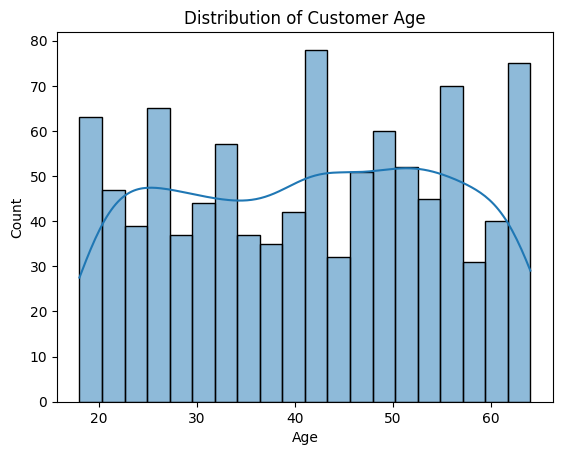

In [ ]:
df.isnull().sum()
df.describe()
#결측치 시각화
#sns.heatmap(df.isnull(), cbar=False)
# 기본 분포 탐색

sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribution of Customer Age")


Text(0.5, 1.0, 'Total Amount by Gender')

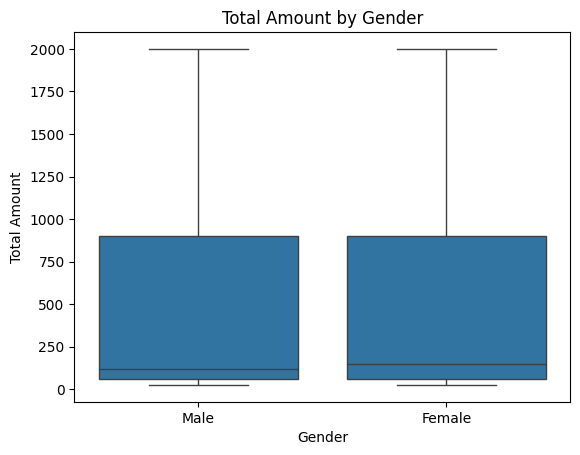

In [14]:
# 남녀 성별 분포 확인
sns.boxplot(x="Gender", y="Total Amount", data=df)
plt.title("Total Amount by Gender")

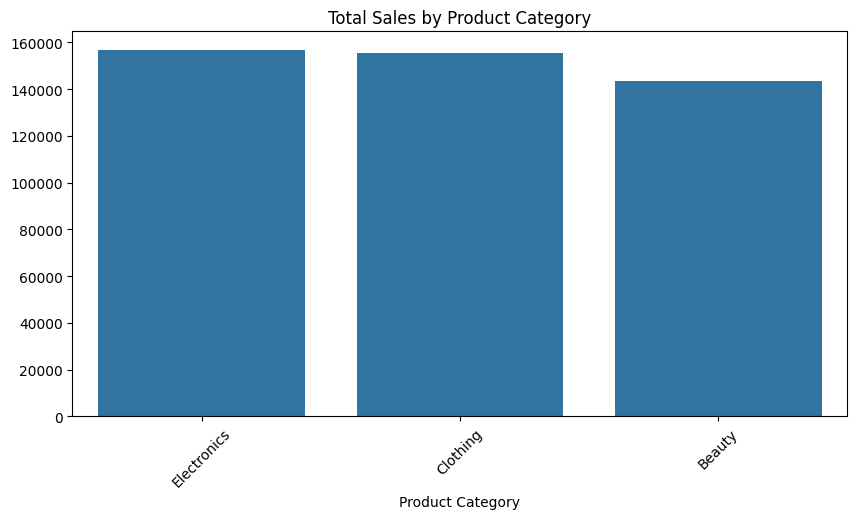

In [ ]:
# 제품 카테고리별 매출 분석
category_sales = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.xticks(rotation=45)
plt.title("Total Sales by Product Category")
plt.show()

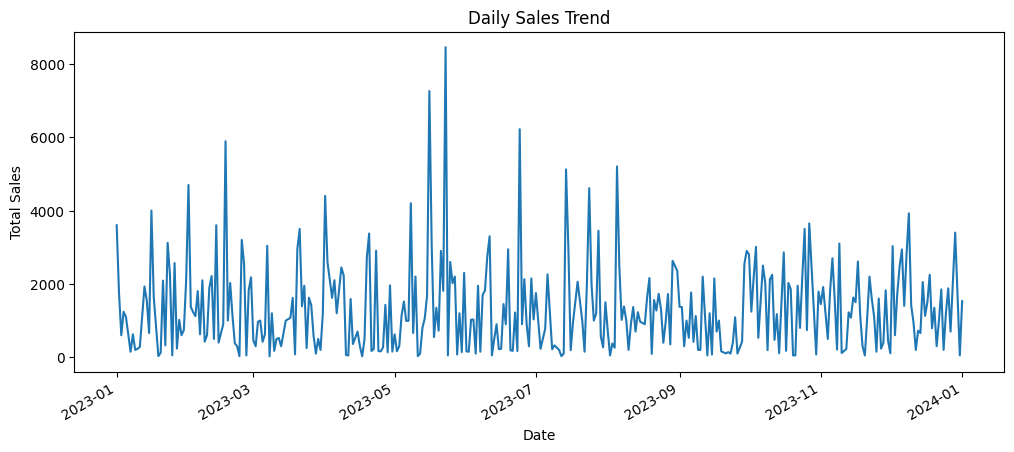

In [18]:
# 날짜(시간)에 따른 매출 변화
df["Date"] = pd.to_datetime(df["Date"])
daily_sales = df.groupby("Date")["Total Amount"].sum()

plt.figure(figsize=(12,5))
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

C:\Users\hsm\AppData\Local\Temp\ipykernel_191704\2148301142.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby(age_group)["Total Amount"].mean()


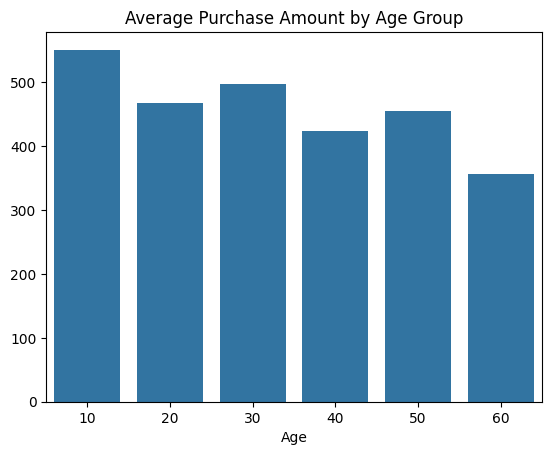

In [22]:
# 고객층별 소비 패턴
age_group = pd.cut(df["Age"], bins=[10,20,30,40,50,60,70], labels=["10","20","30","40","50","60"])
age_sales = df.groupby(age_group)["Total Amount"].mean()

sns.barplot(x=age_sales.index, y=age_sales.values)
plt.title("Average Purchase Amount by Age Group")
plt.show()

In [26]:
# 상위 고객 & 제품 분석
top_customers = df.groupby("Customer ID")["Total Amount"].sum().sort_values(ascending=False).head(10)
top_products = df.groupby("Product Category")["Quantity"].sum().sort_values(ascending=False).head(10)
print(top_customers)
print(top_products)

Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
CUST089    2000
CUST946    2000
CUST157    2000
CUST155    2000
CUST420    2000
Name: Total Amount, dtype: int64
Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


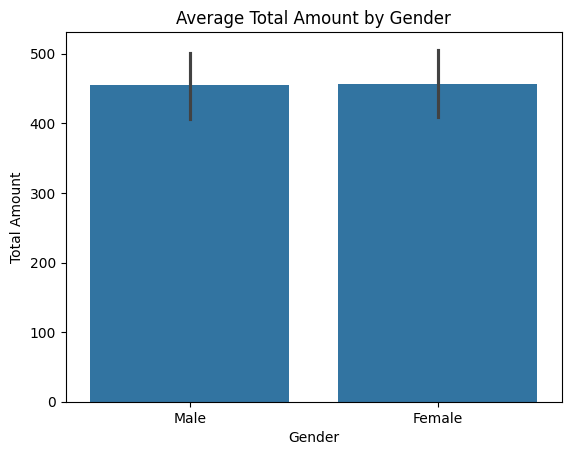

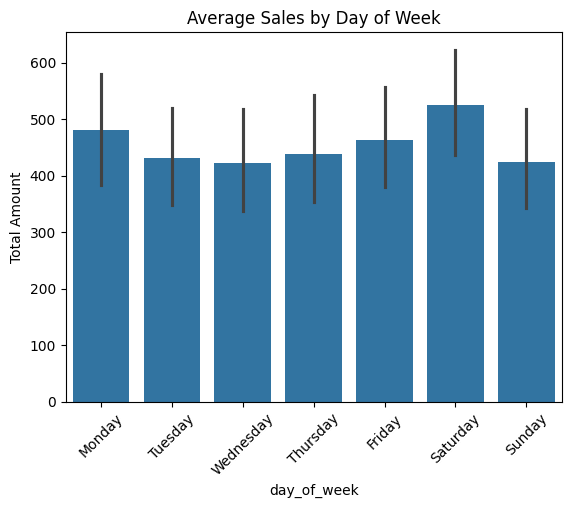

In [27]:
# 성별 평균 매출 비교
sns.barplot(x="Gender", y="Total Amount", data=df, estimator='mean')
plt.title("Average Total Amount by Gender")
plt.show()

# 요일별 평균 매출 비교
df["day_of_week"] = df["Date"].dt.day_name()
sns.barplot(x="day_of_week", y="Total Amount", data=df, estimator='mean',
            order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Average Sales by Day of Week")
plt.xticks(rotation=45)
plt.show()

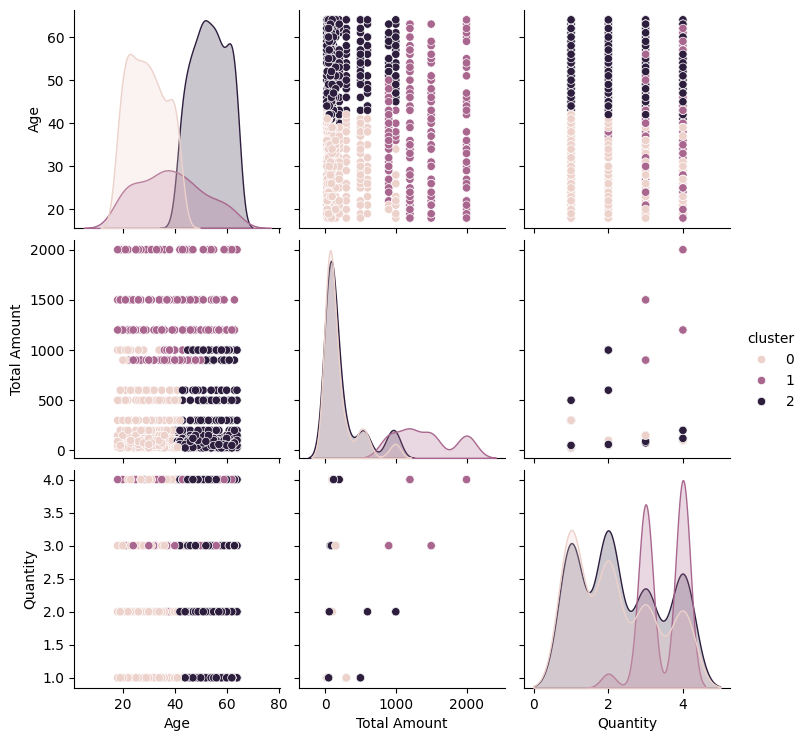

In [28]:
# KMeans 고객 군집화
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[["Age", "Total Amount", "Quantity"]]
X = X.dropna()
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

sns.pairplot(df, hue="cluster", vars=["Age", "Total Amount", "Quantity"])
plt.show()



1. Age (나이) 분포

Cluster 0 (연한 색): 20~40세에 집중되어 있음.

Cluster 2 (짙은 색): 40~65세 사이에 집중되어 있음.

Cluster 1 (중간 색): 중간 연령층이지만 비율이 적음.

결론: Cluster 0은 젊은 층, Cluster 2는 중장년층 중심으로 구분됨.

2. Total Amount (총 구매금액) 분포

대부분의 데이터가 0~500 구간에 몰려 있음.

Cluster 1은 상대적으로 높은 구매 금액 구간에도 존재함.

Cluster 0, 2는 전반적으로 저금액대 분포.

결론: Cluster 1은 고액 구매자 집단, Cluster 0, 2는 일반 소비자층으로 구분 가능.

3. Quantity (구매 수량)

모든 클러스터가 1~4개 범위에 분포.

Cluster 간의 분리도는 낮음 (큰 차이 없음).

약간의 차이는 있지만, 구매 수량만으로는 뚜렷한 군집 구분이 어려움.

결론: 구매 수량은 클러스터 구분에 큰 영향을 미치지 않음.